<a href="https://colab.research.google.com/github/nazbeh/I_C_M_E_2020/blob/master/Workshop3/TF1Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Example

Authors: Anjan Dwaraknath and Sherrie Wang

In this notebook we will learn some basic tensorflow syntax.

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Basic syntax

In [ ]:
a = tf.constant(5) # like their name implies, constants have a constant value
b = tf.constant(6)

In [ ]:
a, b

(<tf.Tensor 'Const_1:0' shape=() dtype=int32>,
 <tf.Tensor 'Const_2:0' shape=() dtype=int32>)

In [ ]:
c = tf.add(a, b) # operations are added to the tensorflow computational graph

In [ ]:
c =  a + b

In [ ]:
c

<tf.Tensor 'add_1:0' shape=() dtype=int32>

In [ ]:
# A session allows to execute graphs or part of graphs
# It allocates resources and holds the values of intermediate results and variables
sess = tf.Session() 

In [ ]:
sess.run(c) # only after the computations are run does TF 1.x populate values with numbers

11

In [ ]:
sess.close() # close the session

In [ ]:
# TensorFlow 2.x now has "eager execution"
# a = tf.constant(5)
# b = tf.constant(6)
# outputs:
# tf.Tensor(5, shape=(), dtype=int32)
# tf.Tensor(6, shape=(), dtype=int32)

## Placeholders and variables

In [ ]:
tf.reset_default_graph()
# clears the graph we've already built and resets it to the default.

In [ ]:
x = tf.placeholder(tf.float32, shape = [3,1])
# x is a placeholder used to store data. its values do not need to be declared yet.

In [ ]:
w = tf.get_variable("w", initializer=tf.truncated_normal([3,3]))
# w is a variable. its values can change during training.

In [ ]:
b = tf.get_variable("b", initializer=tf.zeros([3,1],tf.float32))

In [ ]:
x

<tf.Tensor 'Placeholder:0' shape=(3, 1) dtype=float32>

In [ ]:
y = tf.nn.relu(tf.matmul(w, x) + b)

In [ ]:
y

<tf.Tensor 'Relu:0' shape=(3, 1) dtype=float32>

In [ ]:
# TensorFlow 2.x:
# W = tf.Variable(tf.ones(shape=(3,3)), name="W")
# b = tf.Variable(tf.zeros(shape=(3,1)), name="b")

# x = [[1],[0],[0]]
# y = tf.nn.relu(tf.linalg.matmul(W,x) + b)

# y
# outputs: <tf.Tensor: shape=(3, 1), dtype=float32, numpy=
#          array([[1.],
#                 [1.],
#                 [1.]], dtype=float32)>

## Evaluating graphs with placeholders and variables

"Graph" refers to computational graph, and defines the operations that variables, placeholders, and constants will be subject to. It will not compute and it does not hold any concrete values. A graph is like a TODO list.

In [ ]:
with tf.Session() as sess: # another way to start and stop a session
    sess.run(tf.global_variables_initializer()) # declare all the variables we have initialized
    y_val = sess.run(y, feed_dict={x: [[1],[-2],[3]]})  # feed_dict is used to pass the values for the placeholders

In [ ]:
y_val

array([[3.4116344],
       [0.       ],
       [1.9998865]], dtype=float32)

In [ ]:
fdict = {x:[[1],[-2],[3]],
         b:[[-10],[-10],[-10]]}

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y_val, b_val = sess.run([y,b], feed_dict=fdict)

In [ ]:
y_val

array([[0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
b_val

array([[-10.],
       [-10.],
       [-10.]], dtype=float32)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.assign(w, 100*tf.ones([3,3])))
    y_val, b_val = sess.run([y,b], feed_dict=fdict)

In [ ]:
y_val

array([[190.],
       [190.],
       [190.]], dtype=float32)

In [ ]:
b_val

array([[-10.],
       [-10.],
       [-10.]], dtype=float32)

## Build Two Layers

In [ ]:
tf.reset_default_graph()

In [ ]:
x = tf.placeholder(tf.float32, shape = [2,None])
w1 = tf.get_variable("w1", initializer=0.1*tf.truncated_normal([2,2]))
b1 = tf.get_variable("b1", initializer=tf.zeros([2,1],tf.float32))
w2 = tf.get_variable("w2", initializer=0.1*tf.truncated_normal([2,2]))
b2 = tf.get_variable("b2", initializer=tf.zeros([2,1],tf.float32))

In [ ]:
a1 = tf.nn.relu(tf.matmul(w1,x) + b1)
theta = tf.matmul(w2,a1) + b2
ypred = tf.nn.softmax(theta,axis=0)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y_val = sess.run(ypred, feed_dict={x:[[1,2,4],[-2,2,4]]})

In [ ]:
y_val

array([[0.5053593 , 0.5       , 0.5       ],
       [0.49464077, 0.5       , 0.5       ]], dtype=float32)

## Create some data

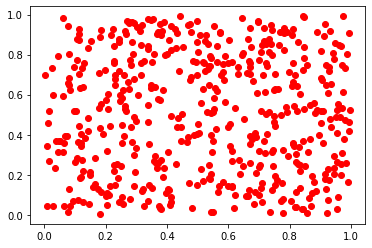

In [ ]:
data = np.random.rand(500,2)
xd, yd = data.T
plt.plot(xd,yd,'ro')

In [ ]:
yclass = (xd-1)**10 + (yd-1)**10 <0.7**10

In [ ]:
yclass = (xd-0.5)**2 + (yd-0.5)**2 <0.1

In [ ]:
yclass = (xd-0.5) + (yd-0.5) <0.1

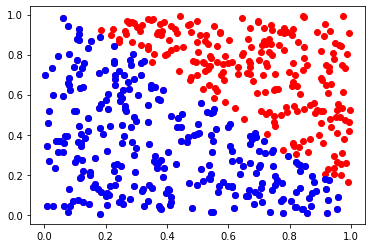

In [ ]:
y_ones = np.where(yclass==1)
plt.plot(xd,yd,'ro')
plt.plot(xd[y_ones],yd[y_ones],'bo')

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y_val = sess.run(ypred, feed_dict={x: data.T})

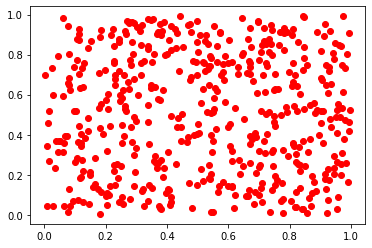

In [ ]:
y_ones = np.where(y_val[0]>0.5)
plt.plot(xd, yd, 'ro')
plt.plot(xd[y_ones], yd[y_ones], 'bo')

## Loss function

In [ ]:
y_data = tf.placeholder(tf.int32, shape = [None])
y = tf.one_hot(y_data, 2)

In [ ]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    labels = y,
    logits = tf.transpose(theta)
))

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost_val = sess.run(cost, feed_dict={x: data.T, y_data: yclass})

In [ ]:
cost_val

0.69508934

## Gradients

In [ ]:
dw1, db1, dw2, db2 = tf.gradients(xs=[w1,b1,w2,b2], ys=cost)

In [ ]:
dw1

<tf.Tensor 'gradients/MatMul_grad/MatMul:0' shape=(2, 2) dtype=float32>

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    cost_val = sess.run(cost, feed_dict={x:data.T, y_data:yclass})
    dw1_val, db1_val, dw2_val, db2_val = sess.run([dw1,db1,dw2,db2], feed_dict={x:data.T,y_data:yclass})

In [ ]:
dw1_val, db1_val, dw2_val, db2_val

(array([[0., 0.],
        [0., 0.]], dtype=float32), array([[0.],
        [0.]], dtype=float32), array([[0., 0.],
        [0., 0.]], dtype=float32), array([[ 0.05400001],
        [-0.05400001]], dtype=float32))

## Gradient Descent operation

In [ ]:
alpha = 0.1

In [ ]:
grad_descent = [ tf.assign(w1, w1 - alpha*dw1 ),
                 tf.assign(b1, b1 - alpha*db1 ),
                 tf.assign(w2, w2 - alpha*dw2 ),
                 tf.assign(b2, b2 - alpha*db2 ),
               ]

In [ ]:
sess.close()

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_vals=[]

In [ ]:
cost_val = sess.run(cost, feed_dict={x:data.T,y_data:yd})
cost_val

0.6933319

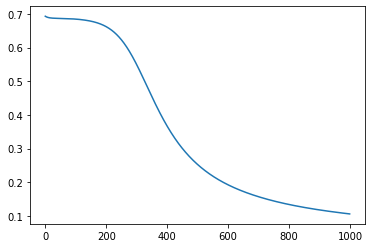

In [ ]:
for i in range(1000):
    cost_vals += [sess.run(cost, feed_dict={x:data.T, y_data:yclass})]
    sess.run(grad_descent, feed_dict={x:data.T, y_data:yclass})
plt.plot(cost_vals)

In [ ]:
cost_val = sess.run(cost,feed_dict={x:data.T, y_data:yclass})
cost_val

0.10566869

In [ ]:
ypred_val = sess.run(ypred,feed_dict={x:data.T,y_data:yclass})

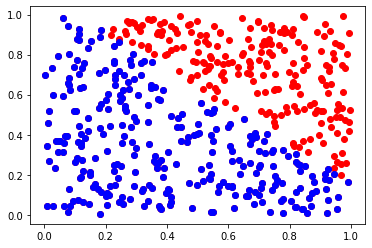

In [ ]:
y_ones = np.where(ypred_val[1] > 0.4)
plt.plot(xd, yd, 'ro')
plt.plot(xd[y_ones], yd[y_ones], 'bo')

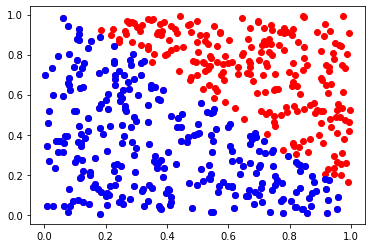

In [ ]:
y_ones = np.where(yclass==1)
plt.plot(xd, yd, 'ro')
plt.plot(xd[y_ones], yd[y_ones], 'bo')